# Pytorch tutorial

Where to find it:\
https://github.com/databio/pytorch_tutorial

References:\
https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

## What is [Pytorch](https://pytorch.org/)
- PyTorch is an open-source Python library for deep learning developed and maintained by Facebook.
- Pytorch is widely used by researchers in the development of new deep learning models and applications

## Install Pytorch

https://pytorch.org/

In [1]:
# check pytorch version
import torch
print(torch.__version__)
# check whether Pytorch supports GPU
print(torch.cuda.is_available())
import numpy as np

2.0.1
False


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

## Pytorch basics

The very basic data structure: [tensor](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html)
- Tensors are similar to NumPy’s ndarrays, except that tensors can run on *GPUs* or *other hardware accelerators*.
- All are tensors: parameters, inputs, and outputs of a model
- Optimized for automatic differentiation (generating gradients)

In [3]:
a = torch.tensor([[1.0, 2.0, 3.0],[2.0, 3.0, 4.0]])
print(a)
print(a.device)
print(a.dtype)

b = a.numpy() # convert a tensor to a numpy array
print(b)
print(b.dtype)

a = np.array([1.0, 2.0, 3.0])
print(a.dtype)
b = torch.tensor(a, dtype=torch.float32) # the default dtype in Pytorch is torch.float32
print(b.dtype)

try:
    c = a.cuda() # move a to a default GPU, use os.environ["CUDA_VISIBLE_DEVICES"] = "0" to specify a default GPU
    c = a.to(torch.device('cuda:1')) # move a to GPU #1
    d = c.cpu() # move c to CPU (memory)
    print(c.device)
except:
    print("GPU not supported")

tensor([[1., 2., 3.],
        [2., 3., 4.]])
cpu
torch.float32
[[1. 2. 3.]
 [2. 3. 4.]]
float32
float64
torch.float32
GPU not supported


In [4]:
d = torch.tensor([[0.5, 1.0]])
print(d.shape)
e = torch.matmul(d, a)
print(e)

torch.Size([1, 2])
tensor([[2.5000, 4.0000, 5.5000]])


Parameter and [Computation graph](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/)

In [6]:
#parameter and computation graph
a = torch.tensor([0.1,0.2,0.3])
print(a.requires_grad)
a = nn.Parameter(a)
print(a)
print('\n')

b = torch.dot(a, a)
print(b.requires_grad)
print(b.grad_fn)
print(a.grad)
b.backward()
print(a.grad)

False
Parameter containing:
tensor([0.1000, 0.2000, 0.3000], requires_grad=True)


True
None
tensor([0.2000, 0.4000, 0.6000])


## How to use Pytorch

1. Prepare the data.
2. Define the model.
3. Train the model.
4. Evaluate the model.
5. Make predictions.

## Prepare the data

PyTorch provides the [Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class that you can extend and customize to load your dataset.

- All datasets that represent a map from keys to data samples should subclass it. 

- All subclasses should overwrite `__getitem__()`, supporting fetching a data sample for a given key. 

- Subclasses could also optionally overwrite __len__(), which is expected to return the size of the dataset by many Sampler implementations and the default options of [DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

- When loading your dataset, you can also perform any required transforms, such as scaling or encoding.

In [6]:
# dataset definition
class MyDataset(torch.utils.data.Dataset):
    # load the dataset
    def __init__(self, path):
        """Setup the dataset
        Need to setup data and labels 
        [Optional] Set any useful properties, e.g. num_classes for classification
        """
        # store the inputs and outputs
        self.data = ...
        self.labels = ...
        # self.num_classes = 10
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.labels)
 
    # get an element from the dataset
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [7]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


## Define the model

- Define a class that extends the [Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) class
- The constructor of your class defines the layers of the model
- Override the `forward()` function to specify how to propagate input through the defined layers of the model
- Many layers are available in the [torch.nn](https://pytorch.org/docs/stable/nn.html) module
- Activation functions can also be defined as layers or just functions ([torch.nn.functional](https://pytorch.org/docs/stable/nn.functional.html))

In [9]:
# model definition
class MLP(torch.nn.Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.layer = torch.nn.Linear(n_inputs, 1)
        self.activation = torch.nn.Sigmoid()
 
    # forward propagate input
    def forward(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X
mlp_model = MLP(10)
print(mlp_model)

MLP(
  (layer): Linear(in_features=10, out_features=1, bias=True)
  (activation): Sigmoid()
)


In [10]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available() else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:
class ConvolutionNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(
                1,
                32,
                kernel_size=3,
                bias=False,
            ),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(
                32,
                64,
                kernel_size=3,
                bias=False,
            ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        logits = self.conv_stack(x)
        return logits

## Train the model

- Define an [Optimizer](https://pytorch.org/docs/stable/optim.html#algorithms)
- Define a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
- [Optional] Define a [learning rate scheduler](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)
- Train the model for multiple epochs
- Monitor the training status, e.g., loss or accuracy
- Save the model

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [14]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

### The importance of calling `optimizer.zero_grad()`

In [ ]:
a = torch.tensor(2.0)
print(a.requires_grad)

x = nn.Parameter(torch.tensor(2.0))
print(x.requires_grad)
y = x * x
print(y.grad_fn)
y.backward()
print(x.grad) # 2*x

# go through the computation a second time
y = x * x
print(y.grad_fn)
y.backward()
print(x.grad) # the gradient is accumulated!

# optimizer.zero_grad() initializes all gradients to None
x.grad = None # zero-out the gradient
y = x * x
print(y.grad_fn)
y.backward()
print(x.grad) # the gradient is accumulated!

In [15]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
print("Done!")
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Epoch 1
-------------------------------
loss: 2.300489  [   64/60000]
loss: 2.286211  [ 6464/60000]
loss: 2.269345  [12864/60000]
loss: 2.265061  [19264/60000]
loss: 2.246170  [25664/60000]
loss: 2.232025  [32064/60000]
loss: 2.226007  [38464/60000]
loss: 2.202749  [44864/60000]
loss: 2.198681  [51264/60000]
loss: 2.174844  [57664/60000]
Epoch 2
-------------------------------
loss: 2.168879  [   64/60000]
loss: 2.158053  [ 6464/60000]
loss: 2.109062  [12864/60000]
loss: 2.124416  [19264/60000]
loss: 2.081723  [25664/60000]
loss: 2.026275  [32064/60000]
loss: 2.048634  [38464/60000]
loss: 1.979564  [44864/60000]
loss: 1.983211  [51264/60000]
loss: 1.919643  [57664/60000]
Epoch 3
-------------------------------
loss: 1.941796  [   64/60000]
loss: 1.911540  [ 6464/60000]
loss: 1.805935  [12864/60000]
loss: 1.839026  [19264/60000]
loss: 1.742735  [25664/60000]
loss: 1.686348  [32064/60000]
loss: 1.706489  [38464/60000]
loss: 1.611423  [44864/60000]
loss: 1.632352  [51264/60000]
loss: 1.53

## Evaluate the model

In [16]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    ref = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f" Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [17]:
# load the  model
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [18]:
test(test_dataloader, model, loss_fn)

 Test Error: 
 Accuracy: 65.0%, Avg loss: 1.089144 



## Make predictions

In [19]:
import matplotlib.pyplot as plt

Predicted: "Trouser", Actual: "Trouser"


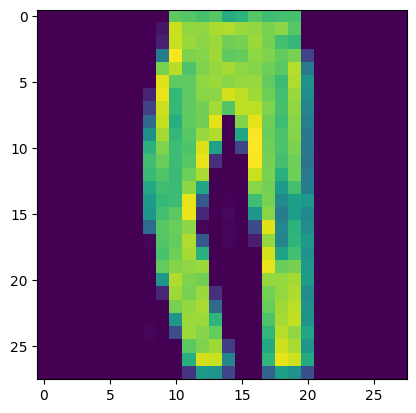

In [20]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[5][0], test_data[5][1]
plt.imshow((x[0].cpu().numpy()*255).astype(np.uint8))
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')